In [15]:
import pickle
import os
import re
import numpy as np
from gensim.models import word2vec
import logging
import pandas as pd

In [4]:
import sys
sys.path.insert(0, '../Core-scripts/')

from parse_and_prepare import ProteinProteinInteractionClassifier as ppi
import file_readers as fr
import prediction as pred

In [19]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [7]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [9]:
yeast_strict_real = pickle.load(open('../../Results/Yeast/yeast_mentions_strict_real.pkl', 'rb'))
yeast_gen_real = pickle.load(open('../../Results/Yeast/yeast_mentions_gen_real.pkl', 'rb'))
yeast_be_real = pickle.load(open('../../Results/Yeast/yeast_mentions_be_real.pkl', 'rb'))
random_seeds = [144, 235, 905, 2895, 3462, 4225, 5056, 5192, 7751, 7813]

In [10]:
for seed in random_seeds:
    real_tr_te_name = 'Yeast/train_test/yeast_tr_te_split_' + str(seed)
    train_data, b, c, d = pred.manual_train_test_split(yeast_strict_real, real_tr_te_name, random_state=seed ,test_set_prop=0.1)

In [11]:
yeast_w2v_model_strict = pred.make_w2v_model(yeast_strict_real, 'Yeast/models/yeast_strict')
yeast_w2v_model_gen = pred.make_w2v_model(yeast_gen_real, 'Yeast/models/yeast_gen')
yeast_w2v_model_be = pred.make_w2v_model(yeast_be_real, 'Yeast/models/yeast_be')

2017-05-13 12:11:31,350 : INFO : collecting all words and their counts
2017-05-13 12:11:31,351 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-13 12:11:31,383 : INFO : collected 11431 word types from a corpus of 188505 raw words and 7145 sentences
2017-05-13 12:11:31,385 : INFO : Loading a fresh vocabulary
2017-05-13 12:11:31,400 : INFO : min_count=6 retains 2978 unique words (26% of original 11431, drops 8453)
2017-05-13 12:11:31,401 : INFO : min_count=6 leaves 173585 word corpus (92% of original 188505, drops 14920)
2017-05-13 12:11:31,411 : INFO : deleting the raw counts dictionary of 11431 items
2017-05-13 12:11:31,413 : INFO : sample=1e-06 downsamples 2978 most-common words
2017-05-13 12:11:31,414 : INFO : downsampling leaves estimated 7107 word corpus (4.1% of prior 173585)
2017-05-13 12:11:31,414 : INFO : estimated required memory for 2978 words and 600 dimensions: 15783400 bytes
2017-05-13 12:11:31,429 : INFO : resetting layer weights
2017-05-

Parsing datasets sentences
Training Word2Vec Model


2017-05-13 12:11:31,793 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-05-13 12:11:31,794 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-05-13 12:11:31,795 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-05-13 12:11:31,795 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-05-13 12:11:31,796 : INFO : training on 942525 raw words (35273 effective words) took 0.3s, 116771 effective words/s
2017-05-13 12:11:31,796 : INFO : precomputing L2-norms of word weight vectors
2017-05-13 12:11:31,815 : INFO : saving Word2Vec object under ../../Results/Yeast/models/yeast_strict_model, separately None
2017-05-13 12:11:31,816 : INFO : not storing attribute syn0norm
2017-05-13 12:11:31,817 : INFO : not storing attribute cum_table
2017-05-13 12:11:31,933 : INFO : saved ../../Results/Yeast/models/yeast_strict_model


Parsing datasets sentences


2017-05-13 12:11:32,746 : INFO : collecting all words and their counts
2017-05-13 12:11:32,747 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-13 12:11:32,795 : INFO : PROGRESS: at sentence #10000, processed 243098 words, keeping 11405 word types
2017-05-13 12:11:32,841 : INFO : PROGRESS: at sentence #20000, processed 486449 words, keeping 15036 word types
2017-05-13 12:11:32,889 : INFO : PROGRESS: at sentence #30000, processed 728927 words, keeping 17673 word types
2017-05-13 12:11:32,938 : INFO : PROGRESS: at sentence #40000, processed 971479 words, keeping 19784 word types


Training Word2Vec Model


2017-05-13 12:11:32,975 : INFO : collected 21147 word types from a corpus of 1155938 raw words and 47662 sentences
2017-05-13 12:11:32,976 : INFO : Loading a fresh vocabulary
2017-05-13 12:11:32,996 : INFO : min_count=6 retains 7355 unique words (34% of original 21147, drops 13792)
2017-05-13 12:11:32,997 : INFO : min_count=6 leaves 1130505 word corpus (97% of original 1155938, drops 25433)
2017-05-13 12:11:33,025 : INFO : deleting the raw counts dictionary of 21147 items
2017-05-13 12:11:33,027 : INFO : sample=1e-06 downsamples 7355 most-common words
2017-05-13 12:11:33,028 : INFO : downsampling leaves estimated 65730 word corpus (5.8% of prior 1130505)
2017-05-13 12:11:33,029 : INFO : estimated required memory for 7355 words and 600 dimensions: 38981500 bytes
2017-05-13 12:11:33,065 : INFO : resetting layer weights
2017-05-13 12:11:33,187 : INFO : training model with 4 workers on 7355 vocabulary and 600 features, using sg=0 hs=0 sample=1e-06 negative=5 window=6
2017-05-13 12:11:33,18

Parsing datasets sentences


2017-05-13 12:11:37,999 : INFO : collecting all words and their counts
2017-05-13 12:11:38,000 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-13 12:11:38,041 : INFO : PROGRESS: at sentence #10000, processed 230983 words, keeping 12390 word types
2017-05-13 12:11:38,080 : INFO : PROGRESS: at sentence #20000, processed 459935 words, keeping 16972 word types
2017-05-13 12:11:38,122 : INFO : PROGRESS: at sentence #30000, processed 688750 words, keeping 20327 word types
2017-05-13 12:11:38,167 : INFO : PROGRESS: at sentence #40000, processed 917192 words, keeping 22966 word types


Training Word2Vec Model


2017-05-13 12:11:38,210 : INFO : PROGRESS: at sentence #50000, processed 1144561 words, keeping 25294 word types
2017-05-13 12:11:38,257 : INFO : PROGRESS: at sentence #60000, processed 1373317 words, keeping 27272 word types
2017-05-13 12:11:38,304 : INFO : PROGRESS: at sentence #70000, processed 1602255 words, keeping 29021 word types
2017-05-13 12:11:38,348 : INFO : PROGRESS: at sentence #80000, processed 1831656 words, keeping 30642 word types
2017-05-13 12:11:38,390 : INFO : PROGRESS: at sentence #90000, processed 2059677 words, keeping 32239 word types
2017-05-13 12:11:38,433 : INFO : PROGRESS: at sentence #100000, processed 2288822 words, keeping 33691 word types
2017-05-13 12:11:38,476 : INFO : PROGRESS: at sentence #110000, processed 2518580 words, keeping 35007 word types
2017-05-13 12:11:38,519 : INFO : PROGRESS: at sentence #120000, processed 2747217 words, keeping 36300 word types
2017-05-13 12:11:38,563 : INFO : PROGRESS: at sentence #130000, processed 2975728 words, keep

In [13]:
for seed in random_seeds:
    data_name = '../../Results/Yeast/train_test/yeast_tr_te_split_' + str(seed)
    train_data = pickle.load(open(data_name + '_train_data.pkl', 'rb'))
    train_labels = pickle.load(open(data_name + '_train_labels.pkl', 'rb'))
    test_data = pickle.load(open(data_name + '_test_data.pkl', 'rb'))
    test_labels = pickle.load(open(data_name + '_test_labels.pkl', 'rb'))

    w2v_train_vecs, w2v_test_vecs = pred.word_2_vec_feat_vecs(train_data, test_data, yeast_w2v_model_strict, feature_count=600)

    strict_list_SR_dims_param = [w2v_train_vecs, w2v_test_vecs,
                                 train_labels, test_labels]

    w2v_train_vecs, w2v_test_vecs = pred.word_2_vec_feat_vecs(train_data, test_data, yeast_w2v_model_gen, feature_count=600)

    strict_list_GEN_dims_param = [w2v_train_vecs, w2v_test_vecs,
                                  train_labels, test_labels]

    w2v_train_vecs, w2v_test_vecs = pred.word_2_vec_feat_vecs(train_data, test_data, yeast_w2v_model_be, feature_count=600)

    strict_list_BE_dims_param = [w2v_train_vecs, w2v_test_vecs,
                                 train_labels, test_labels]

    pickle.dump(strict_list_SR_dims_param, open('../../Results/Yeast/result_list/yeast_strict_list_SR_dims_param_'+str(seed)+'_results_list.pkl', 'wb'))
    pickle.dump(strict_list_GEN_dims_param, open('../../Results/Yeast/result_list/yeast_strict_list_GEN_dims_param_'+str(seed)+'_results_list.pkl', 'wb'))
    pickle.dump(strict_list_BE_dims_param, open('../../Results/Yeast/result_list/yeast_strict_list_BE_dims_param_'+str(seed)+'_results_list.pkl', 'wb'))

In [28]:
def modelfit(alg, train_vecs, train_labels, w2v_model_type, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param=alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train_vecs, 
                              label=train_labels)
        cvresult = xgb.cv(xgb_param, 
                          xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds, 
                          metrics='auc', 
                          early_stopping_rounds=50)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    #fit the algorithm on the data
    alg.fit(train_vecs, train_labels, eval_metric='auc')
    
    #Predict training set:
    train_predictions = alg.predict(train_vecs)
    train_predprob = alg.predict_proba(train_vecs)[:,1]
    
    #Print Model report:
    print(w2v_model_type, '\nModel Report')
    print(w2v_model_type, 'Accuracy: %.4g' % metrics.accuracy_score(train_labels, train_predictions))
    print(w2v_model_type, 'AUC Score (Train): %f' % metrics.roc_auc_score(train_labels, train_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance')
    plt.ylabel('Feature Importance Score')

    error = 1-metrics.accuracy_score(train_labels, train_predictions)
    auc = metrics.roc_auc_score(train_labels, train_predprob)
    
    return error, auc

144
STRICT 
Model Report
STRICT Accuracy: 0.6019
STRICT AUC Score (Train): 0.628022
GEN 
Model Report
GEN Accuracy: 0.6309
GEN AUC Score (Train): 0.672836
BE 
Model Report
BE Accuracy: 0.6039
BE AUC Score (Train): 0.654637
235
STRICT 
Model Report
STRICT Accuracy: 0.616
STRICT AUC Score (Train): 0.641866
GEN 
Model Report
GEN Accuracy: 0.6278
GEN AUC Score (Train): 0.665564
BE 
Model Report
BE Accuracy: 0.6073
BE AUC Score (Train): 0.633584
905
STRICT 
Model Report
STRICT Accuracy: 0.6221
STRICT AUC Score (Train): 0.669129
GEN 
Model Report
GEN Accuracy: 0.6236
GEN AUC Score (Train): 0.659984
BE 
Model Report
BE Accuracy: 0.6122
BE AUC Score (Train): 0.636338
2895
STRICT 
Model Report
STRICT Accuracy: 0.6084
STRICT AUC Score (Train): 0.645622
GEN 
Model Report
GEN Accuracy: 0.6269
GEN AUC Score (Train): 0.658402
BE 
Model Report
BE Accuracy: 0.6207
BE AUC Score (Train): 0.655032
3462
STRICT 
Model Report
STRICT Accuracy: 0.6163
STRICT AUC Score (Train): 0.662036
GEN 
Model Report
GEN A

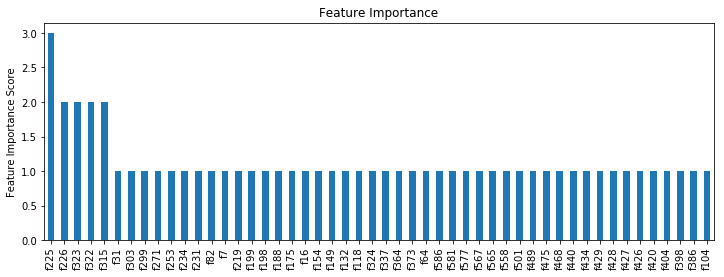

In [31]:
xgb1 = XGBClassifier(learning_rate = 0.1, 
                     n_estimators=1000, 
                     max_depth=5, 
                     min_child_weight=1, 
                     gamma=0, 
                     subsample=0.8, 
                     colsample_bytree=0.8, 
                     objective='binary:logistic', 
                     nthread=4, 
                     scale_pos_weight=1, 
                     seed=24)

strict_error_list = []
strict_auc_list = []
gen_error_list = []
gen_auc_list = []
be_error_list = []
be_auc_list = []

for seed in random_seeds:
    
    strict_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_SR_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    gen_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_GEN_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    be_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_BE_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    print(seed)
    strict_error, strict_auc = modelfit(xgb1, strict_list[0], strict_list[2], 'STRICT')
    gen_error, gen_auc = modelfit(xgb1, gen_list[0], gen_list[2], 'GEN')
    be_error, be_auc = modelfit(xgb1, be_list[0], be_list[2], 'BE')
    
    strict_error_list.append(strict_error)
    strict_auc_list.append(strict_auc)
    gen_error_list.append(gen_error)
    gen_auc_list.append(gen_auc)
    be_error_list.append(be_error)
    be_auc_list.append(be_auc)

In [32]:
print('Strict Results Error: ', np.mean(strict_error_list), ', Auc: ', np.mean(strict_auc_list))
print('Gen Results Error: ', np.mean(gen_error_list), ', Auc: ', np.mean(gen_auc_list))
print('Be Results Error: ', np.mean(be_error_list), ', Auc: ', np.mean(be_auc_list))

Strict Results Error:  0.378943362667 , Auc:  0.66059997443
Gen Results Error:  0.371137665262 , Auc:  0.669424603342
Be Results Error:  0.381628285206 , Auc:  0.656050922499


In [36]:
param_test1 = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_child_weight':[1,2,3,4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                                                  n_estimators=140, 
                                                  max_depth=5, 
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8, 
                                                  objective='binary:logistic', 
                                                  nthread=4, 
                                                  scale_pos_weight=1, 
                                                  seed=24), 
                        param_grid=param_test1, 
                        scoring='roc_auc', 
                        n_jobs=4, 
                        iid=False, 
                        cv=5)

In [37]:
strict_param_test1 = []
for seed in random_seeds:
    strict_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_SR_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    gsearch1.fit(strict_list[0], strict_list[2])
    strict_param_test1.append((seed, (gsearch1.best_params_, gsearch1.best_score_)))

KeyboardInterrupt: 

In [ ]:
gen_param_test1 = []
for seed in random_seeds:
    gen_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_GEN_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    gsearch1.fit(gen_list[0], gen_list[2])
    gen_param_test1.append((seed, (gsearch1.best_params_, gsearch1.best_score_)))

In [ ]:
be_param_test1 = []
for seed in random_seeds:
    be_list = pickle.load(open('../../Results/Yeast/result_list/yeast_strict_list_BE_dims_param_'+str(seed)+'_results_list.pkl', 'rb'))
    gsearch1.fit(be_list[0], be_list[2])
    be_param_test1.append((seed, (gsearch1.best_params_, gsearch1.best_score_)))

In [ ]:
for i in range(10):
    print('\n', strict_param_test1[i], '\n', gen_param_test1[i], '\n', be_param_test1[i], '\n')